## Problems
Imbalanced Dataset: With only 16.07% of customers having churned, the model may struggle to learn effectively. This could lead to a model that predicts most customers as non-churners.
Feature Importance: Understanding which features are most influential in predicting churn can help the bank tailor their customer retention strategies.
Customer Segmentation: Identifying segments of customers that are more likely to churn can help target retention efforts more effectively.
Predictive Model Accuracy: Ensuring that the model is accurately predicting churn while minimizing false positives and false negatives.
## Questions
1- what are the main characteristics of customers who have churned compared to those who have not?

2- Explore methods to address the imbalance in the dataset.
Which features have the most significant impact on customer churn?

3- Use techniques like feature importance from models, correlation analysis, or recursive feature elimination.
What predictive models are suitable for this type of problem, and how do they perform on our dataset?

4- Consider testing various algorithms (e.g., logistic regression, decision trees, random forests, XGBoost) and compare their performance.
How can we validate the model to ensure it generalizes well to unseen data?

5- Plan for cross-validation and test data evaluation to avoid overfitting.
What actionable insights can be derived from the model's predictions to improve customer retention?

Develop strategies based on the model's results to proactively reach out to at-risk customers.

In [90]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [91]:
df=pd.read_csv('BankChurners.csv',encoding='windows=1254')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [93]:
df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1, inplace=True)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [95]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 1- what are the main characteristics of customers who have churned compared to those who have not?

*first customer is curned comped*

In [96]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [97]:
unique_value=df['Attrition_Flag'].unique()
unique_value

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [98]:
churned_customers =df[df['Attrition_Flag']=='Attrited Customerr']
existing_customers =df[df['Attrition_Flag']=='Existing Customer']
print('churned customers:')
print(churned_customers.describe())
print('existing customers:')
print(existing_customers.describe())

churned customers:
       CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count        0.0           0.0              0.0             0.0   
mean         NaN           NaN              NaN             NaN   
std          NaN           NaN              NaN             NaN   
min          NaN           NaN              NaN             NaN   
25%          NaN           NaN              NaN             NaN   
50%          NaN           NaN              NaN             NaN   
75%          NaN           NaN              NaN             NaN   
max          NaN           NaN              NaN             NaN   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                       0.0                     0.0   
mean                        NaN                     NaN   
std                         NaN                     NaN   
min                         NaN                     NaN   
25%                         NaN                     NaN   
50%                    

In [99]:
# Count the total number of customers
total_customers = len(df)

# Count the number of churned customers
num_churned = df[df['Attrition_Flag'] == 'Attrited Customer'].shape[0]

# Count the number of existing customers
num_existing = df[df['Attrition_Flag'] == 'Existing Customer'].shape[0]

# Calculate the percentage of churned customers
percentage_churned = (num_churned / total_customers) * 100

# Calculate the percentage of existing customers
percentage_existing = (num_existing / total_customers) * 100

# Display the results
print(f'Percentage of churned customers: {percentage_churned:.2f}%')
print(f'Percentage of existing customers: {percentage_existing:.2f}%')

Percentage of churned customers: 16.07%
Percentage of existing customers: 83.93%


Text(0, 0.5, 'Average Transaction Amount')

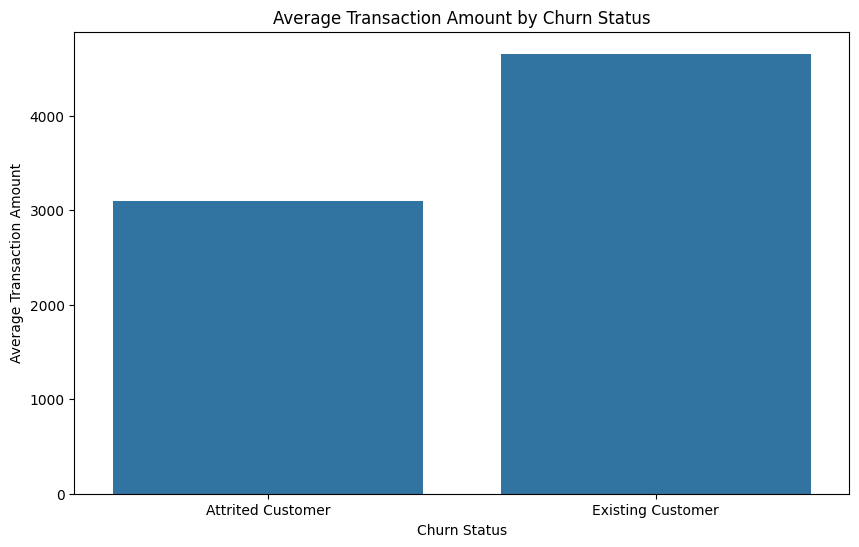

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_transaction = df.groupby('Attrition_Flag')['Total_Trans_Amt'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition_Flag', y='Total_Trans_Amt', data=mean_transaction)

# Set titles and labels
plt.title('Average Transaction Amount by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Transaction Amount')


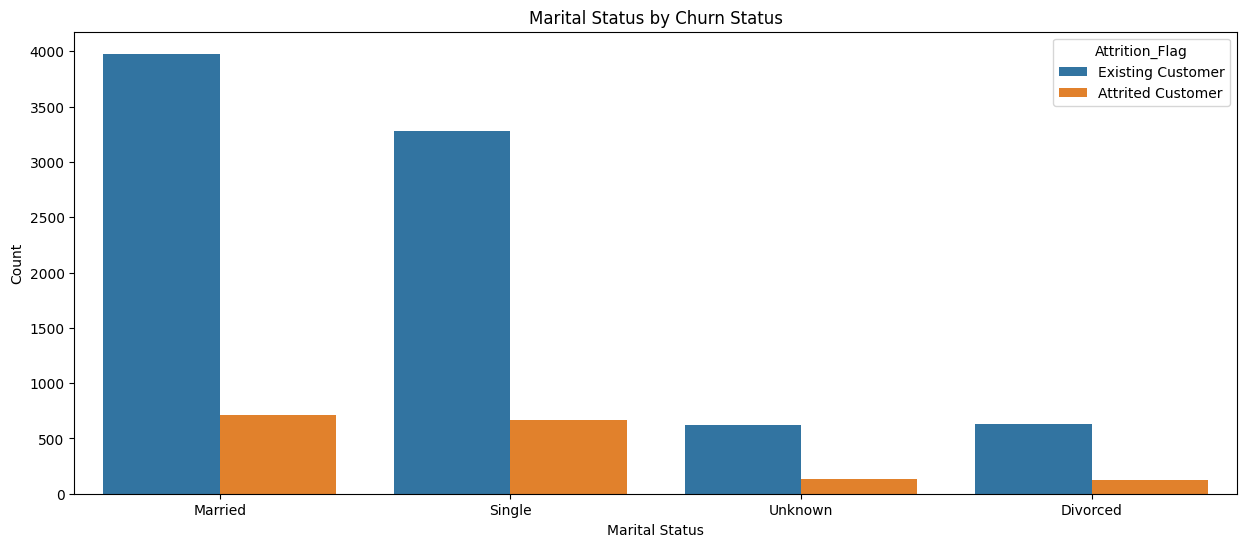

In [101]:
plt.figure(figsize=(15,6))
sns.countplot(x='Marital_Status',hue='Attrition_Flag',data=df)
# Set titles and labels
plt.title('Marital Status by Churn Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Show the plot
plt.show()

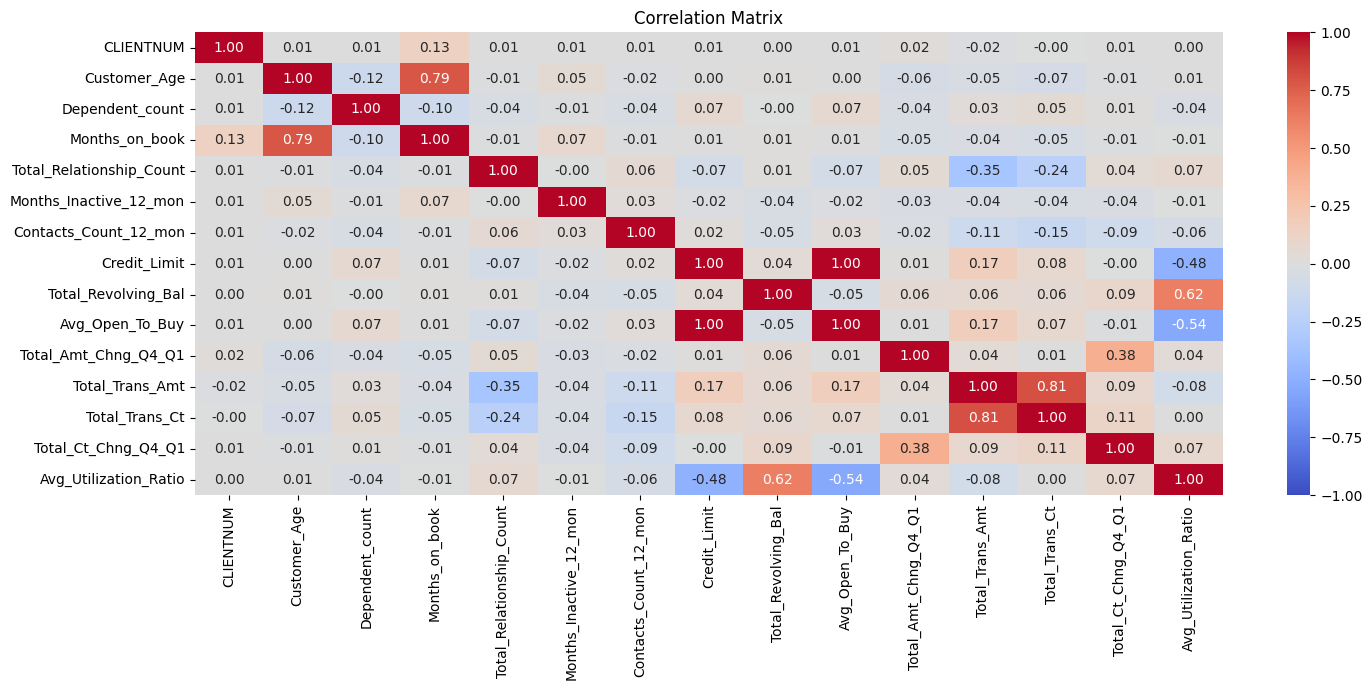

In [102]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.tight_layout()  
plt.show()

**2- Explore methods to address the imbalance in the dataset.
Which features have the most significant impact on customer churn?**

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load dataset

# Separate features and target variable
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Convert categorical features to numerical
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances


                   precision    recall  f1-score   support

Attrited Customer       0.87      0.86      0.86       488
Existing Customer       0.97      0.97      0.97      2551

         accuracy                           0.96      3039
        macro avg       0.92      0.92      0.92      3039
     weighted avg       0.96      0.96      0.96      3039



,importance
Total_Trans_Amt,0.198701
Total_Trans_Ct,0.198542
Total_Revolving_Bal,0.099693
Total_Ct_Chng_Q4_Q1,0.094729
Total_Relationship_Count,0.051079
Avg_Utilization_Ratio,0.050676
Total_Amt_Chng_Q4_Q1,0.045318
Avg_Open_To_Buy,0.026710
Credit_Limit,0.025305
Customer_Age,0.025272


                                importance
Total_Trans_Amt                   0.198701
Total_Trans_Ct                    0.198542
Total_Revolving_Bal               0.099693
Total_Ct_Chng_Q4_Q1               0.094729
Total_Relationship_Count          0.051079
Avg_Utilization_Ratio             0.050676
Total_Amt_Chng_Q4_Q1              0.045318
Avg_Open_To_Buy                   0.026710
Credit_Limit                      0.025305
Customer_Age                      0.025272
Gender_F                          0.022193
Months_Inactive_12_mon            0.017937
Months_on_book                    0.016775
Marital_Status_Single             0.016080
Contacts_Count_12_mon             0.013601
Gender_M                          0.012515
Marital_Status_Married            0.011757
Dependent_count                   0.009190
Income_Category_Less than $40K    0.007447
Education_Level_Graduate          0.006886
Income_Category_$80K - $120K      0.005438
Education_Level_Unknown           0.004538
Income_Cate

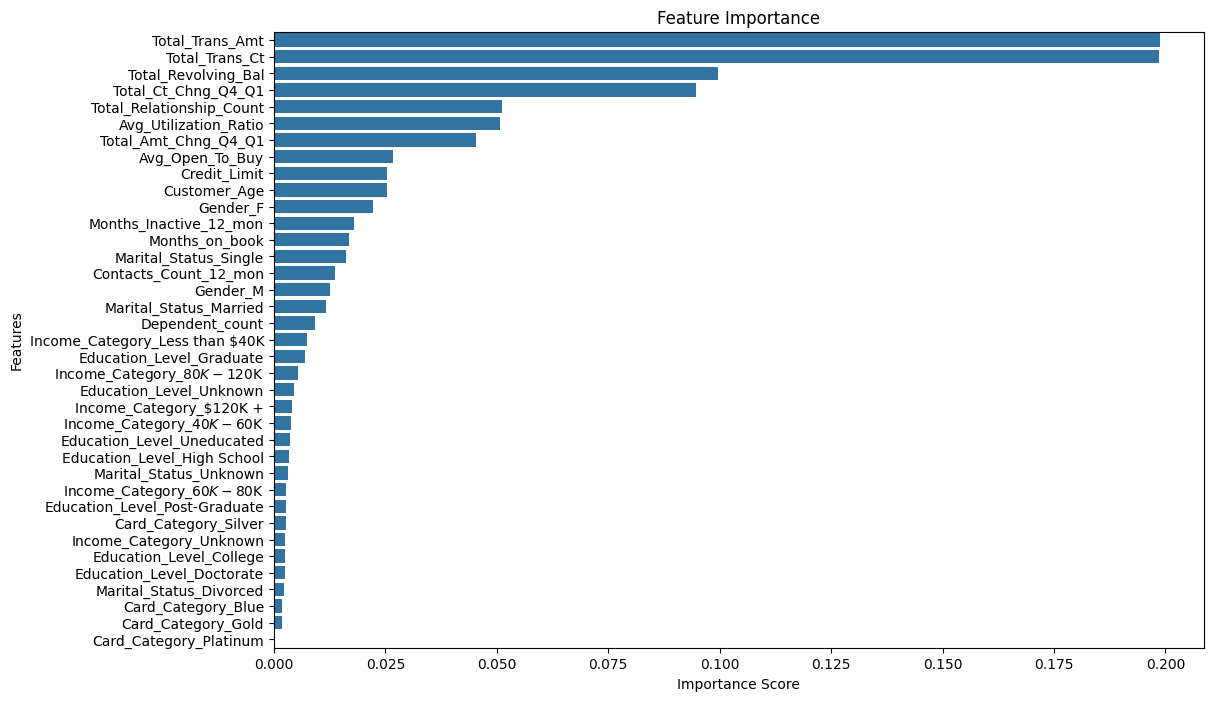

In [104]:


# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Display feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


**3- Use techniques like feature importance from models, correlation analysis, or recursive feature elimination.
What predictive models are suitable for this type of problem, and how do they perform on our dataset?**

**Objective of the Code:**
The goal of this code is to evaluate the performance of different models in predicting customer churn. It does this by comparing performance metrics such as precision, recall, and F1-score for each model, which helps in selecting the most efficient model for predicting customer churn.

In [105]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Separate features and target variable
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

c:\Users\MADRID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63       488
           1       0.91      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.84      0.75      0.78      3039
weighted avg       0.89      0.90      0.89      3039

Decision Tree:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       488
           1       0.96      0.96      0.96      2551

    accuracy                           0.93      3039
   macro avg       0.88      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039

Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       488
           1       0.95      0.99      0.97      2551

    accuracy                           0.95      3039
   macro avg       0.93      0.87      0.90      3039
weighted avg       0

c:\Users\MADRID\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [04:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**4- Consider testing various algorithms (e.g., logistic regression, decision trees, random forests, XGBoost) and compare their performance.
How can we validate the model to ensure it generalizes well to unseen data?**

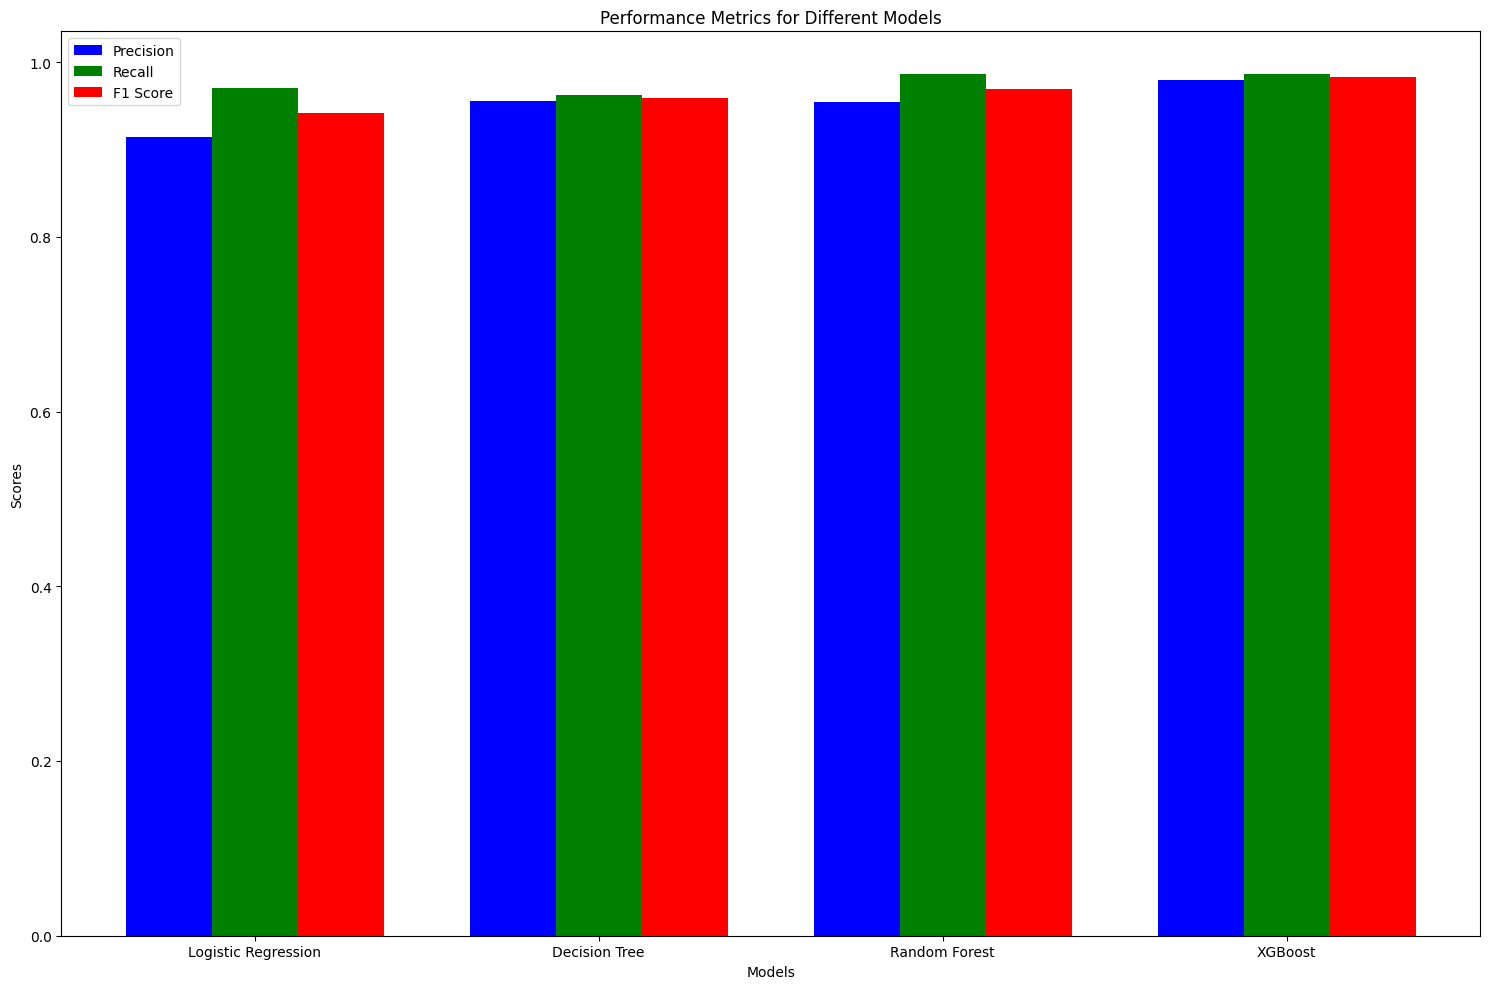

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification reports for each model
reports = {
    'Logistic Regression': classification_report(y_test, y_pred_log, output_dict=True),
    'Decision Tree': classification_report(y_test, y_pred_tree, output_dict=True),
    'Random Forest': classification_report(y_test, y_pred_rf, output_dict=True),
    'XGBoost': classification_report(y_test, y_pred_xgb, output_dict=True)
}

# Extract metrics from the reports
models = list(reports.keys())
precision = [reports[model]['1']['precision'] for model in models]
recall = [reports[model]['1']['recall'] for model in models]
f1_score = [reports[model]['1']['f1-score'] for model in models]

# Set up the bar chart
x = np.arange(len(models))  # Model positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
bars1 = ax.bar(x - width, precision, width, label='Precision', color='b')
bars2 = ax.bar(x, recall, width, label='Recall', color='g')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='r')

# Add labels and title to the chart
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


**5- Plan for cross-validation and test data evaluation to avoid overfitting.
What actionable insights can be derived from the model's predictions to improve customer retention?**


In [107]:
from sklearn.model_selection import  StratifiedKFold, GridSearchCV

# Separate features and target variable
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# K-Fold Cross-Validation Setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Train Logistic Regression as an example
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))

# Predictive Insights
def actionable_insights(model, X):
    # Assuming model provides feature importances or coefficients
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    else:
        importance = model.coef_[0]

    # Create a DataFrame for insights
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Identify top features affecting churn
    print ("Top Features Affecting Churn:\n", feature_importance_df.head(10))

# Call actionable insights function
actionable_insights(best_rf_model, X)

# Summary of Retention Strategies
print("""
Actionable Insights for Improving Customer Retention:
1. Identify at-risk customers based on model predictions.
2. Segment customers for targeted marketing campaigns.
3. Personalize marketing strategies based on churn probability.
4. Enhance customer experience by addressing pain points.
5. Implement proactive engagement for at-risk customers.
6. Monitor retention metrics and adjust strategies as needed.
7. Utilize customer feedback to inform improvements.
8. Predictive maintenance for service-oriented businesses.
""")

Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       488
           1       0.95      0.99      0.97      2551

    accuracy                           0.95      3039
   macro avg       0.93      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039

Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63       488
           1       0.91      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.84      0.75      0.78      3039
weighted avg       0.89      0.90      0.89      3039

Top Features Affecting Churn:
                      Feature  Importance
10           Total_Trans_Amt    0.173713
11            Total_Trans_Ct    0.157923
12       Total_Ct_Chng_Q4_Q1    0.118294
7        Total_Revolving_Bal    0.104644
3   Total_Relationship_Count    0.062135
13     Avg_Utilization_Ratio   

c:\Users\MADRID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
